<a href="https://colab.research.google.com/github/CecileKafrouni/IntrusionDetection/blob/main/ModeleML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

#Math modules
import numpy as np
import time

#Models tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import Perceptron

path = '/content/drive/MyDrive/mespi/'

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
import warnings
warnings.filterwarnings('ignore')

# Nouvelle section

# Modele Knn


In [8]:
df=pd.read_csv(path + "df_total_csv_normalisee_DoH.csv", sep=';')
colonne = 'DoH'

In [9]:
def ROC_curve(df, colonne, model, model_name):
    
    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
    
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic for ' + model_name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [25]:
def DTC(df, colonne,criterion_param, splitter_param, max_depth_param,
                                 min_samples_split_param, min_samples_leaf_param, min_weight_fraction_leaf_param, 
                                 max_features_param, random_state_param, max_leaf_nodes_param, min_impurity_decrease_param, 
                                 min_impurity_split_param, class_weight_param, ccp_alpha_param):
    
    t_debut = time.time()

    print("Training Decision Tree Classifier Algo ...\n ")
    # Create Decision Tree classifer object
    DTC = DecisionTreeClassifier(criterion=criterion_param, splitter=splitter_param, max_depth=max_depth_param,
                                 min_samples_split=min_samples_split_param, min_samples_leaf=min_samples_leaf_param, 
                                 min_weight_fraction_leaf=min_weight_fraction_leaf_param, 
                                 max_features=max_features_param, random_state=random_state_param, 
                                 max_leaf_nodes=max_leaf_nodes_param, min_impurity_decrease=min_impurity_decrease_param, 
                                 min_impurity_split=min_impurity_split_param, class_weight=class_weight_param, 
                                 ccp_alpha=ccp_alpha_param)

    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

    
    # Train Decision Tree Classifer
    DTC = DTC.fit(X_train,y_train)
       
    y_pred_DTC = DTC.predict(X_test)
    
    # Metriques du Decision Tree Classifier
    
    print('\tReport Decision Tree Classifier \n\n', classification_report(y_test, y_pred_DTC))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour DTClassifier (en sec): ", np.round(t_total,4))
        
     
    ROC_curve(df, colonne, DTC, 'Decision Tree Classifier')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_DTC))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_DTC))
    print("\nPrecision :", precision_score(y_test, y_pred_DTC))
    print("\nF1 score :", f1_score(y_test, y_pred_DTC))

    return DTC

Training Decision Tree Classifier Algo ...
 
	Report Decision Tree Classifier 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179284
         1.0       1.00      1.00      1.00    179714

    accuracy                           1.00    358998
   macro avg       1.00      1.00      1.00    358998
weighted avg       1.00      1.00      1.00    358998

Temps pour DTClassifier (en sec):  128.1872


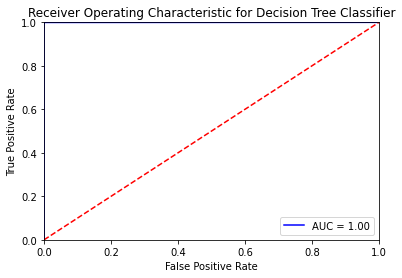


Matrice de confusion : 
 [[179196     88]
 [    83 179631]]

Accuracy :  0.9995236742265974

Precision : 0.9995103467079163

F1 score : 0.9995242506948443


In [26]:
dtc_1 = DTC(df, colonne,criterion_param='gini', splitter_param='best', max_depth_param=None, min_samples_split_param=2, 
            min_samples_leaf_param=1, min_weight_fraction_leaf_param=0.0, max_features_param=None, random_state_param=None, 
            max_leaf_nodes_param=None, min_impurity_decrease_param=0.0, min_impurity_split_param=None, class_weight_param=None, 
            ccp_alpha_param=0.0)

In [12]:
def KNN(df, colonne,n_neighbors):
    
    t_debut = time.time()

    print("Training KNN ...\n ")
    # Create KneighborsClassifier object
    KNN = KNeighborsClassifier()

    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

    
    # Train knn
    KNN = KNN.fit(X_train,y_train)
       
    y_pred_KNN = KNN.predict(X_test)
    
    # Metriques du Knn
    
    print('\tReport KNN \n\n', classification_report(y_test, y_pred_KNN))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour KNN (en sec): ", np.round(t_total,4))
        
     
    ROC_curve(df, colonne, KNN, 'K neighbors classifier')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_KNN))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_KNN))
    print("\nPrecision :", precision_score(y_test, y_pred_KNN))
    print("\nF1 score :", f1_score(y_test, y_pred_KNN))

    return KNN


Training Decision Tree Classifier Algo ...
 
	Report KNN 

               precision    recall  f1-score   support

         0.0       0.96      0.71      0.81    179284
         1.0       0.77      0.97      0.86    179714

    accuracy                           0.84    358998
   macro avg       0.87      0.84      0.84    358998
weighted avg       0.87      0.84      0.84    358998

Temps pour KNN (en sec):  2396.8783


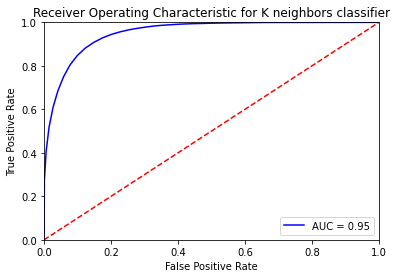


Matrice de confusion : 
 [[126673  52611]
 [  4921 174793]]

Accuracy :  0.8397428397929794

Precision : 0.7686452305148547

F1 score : 0.8586847056627317


In [15]:
knn_1 = KNN(df, colonne)

Training Decision Tree Classifier Algo ...
 
	Report KNN 

               precision    recall  f1-score   support

         0.0       0.96      0.71      0.82    179284
         1.0       0.77      0.97      0.86    179714

    accuracy                           0.84    358998
   macro avg       0.87      0.84      0.84    358998
weighted avg       0.87      0.84      0.84    358998

Temps pour KNN (en sec):  1880.0094


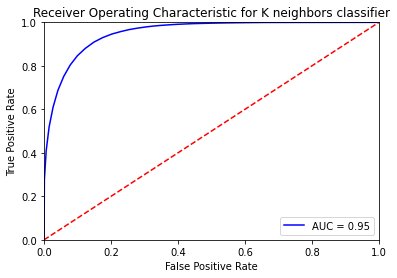


Matrice de confusion : 
 [[126606  52678]
 [  4781 174933]]

Accuracy :  0.839946183544198

Precision : 0.7685612734006705

F1 score : 0.8589357392745351


In [13]:
knn_1 = KNN(df, colonne)

# Modele GNB

In [31]:
def GNB(df, colonne,var_smoothing,max_depth_param):
    
    t_debut = time.time()

    print("Training GNB ...\n ")
    # Create GaussianNB object
    GNB = GaussianNB(var_smoothing=1e-7,max_depth_param)

    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)

    
    # Train GNB
    GNB = GNB.fit(X_train,y_train)
       
    y_pred_GNB = GNB.predict(X_test)
    
    # Metriques du GNB
    
    print('\tReport GNB \n\n', classification_report(y_test, y_pred_GNB))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour GNB (en sec): ", np.round(t_total,4))
        
     
    ROC_curve(df, colonne, GNB, 'GNB')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_GNB))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_GNB))
    print("\nPrecision :", precision_score(y_test, y_pred_GNB))
    print("\nF1 score :", f1_score(y_test, y_pred_GNB))

    return GNB

Paramètre de base 

In [29]:
gnb_1 = GNB(df, colonne)

TypeError: ignored

Training GNB ...
 
	Report GNB 

               precision    recall  f1-score   support

         0.0       0.54      0.98      0.70    179136
         1.0       0.89      0.18      0.30    179862

    accuracy                           0.58    358998
   macro avg       0.72      0.58      0.50    358998
weighted avg       0.72      0.58      0.50    358998

Temps pour GNB (en sec):  27.5002


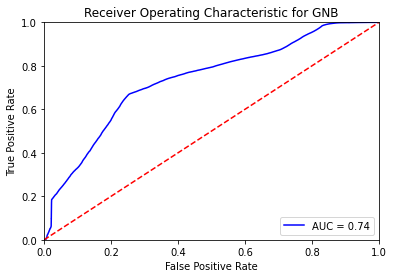


Matrice de confusion : 
 [[175117   4019]
 [147071  32791]]

Accuracy :  0.5791341455941259

Precision : 0.8908177125781038

F1 score : 0.3026787032934574


In [32]:
gnb_1 = GNB(df, colonne,var_smoothing=1e-7)

Training GNB ...
 
	Report GNB 

               precision    recall  f1-score   support

         0.0       0.54      0.98      0.70    179136
         1.0       0.89      0.18      0.30    179862

    accuracy                           0.58    358998
   macro avg       0.72      0.58      0.50    358998
weighted avg       0.72      0.58      0.50    358998

Temps pour GNB (en sec):  30.3485


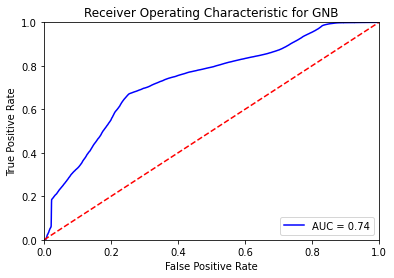


Matrice de confusion : 
 [[175121   4015]
 [147103  32759]]

Accuracy :  0.5790561507306448

Precision : 0.8908196008049165

F1 score : 0.30243357521372255


In [33]:
gnb_1 = GNB(df, colonne,var_smoothing=1e-4)

Training GNB ...
 
	Report GNB 

               precision    recall  f1-score   support

         0.0       0.54      0.98      0.70    179136
         1.0       0.89      0.18      0.31    179862

    accuracy                           0.58    358998
   macro avg       0.72      0.58      0.50    358998
weighted avg       0.72      0.58      0.50    358998

Temps pour GNB (en sec):  32.3383


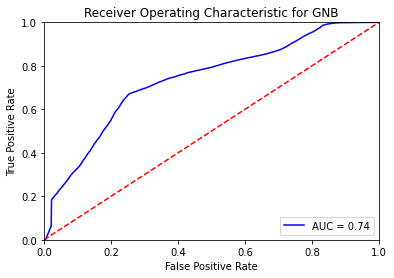


Matrice de confusion : 
 [[175120   4016]
 [146754  33108]]

Accuracy :  0.5800255154624817

Precision : 0.8918220019394462

F1 score : 0.3051625450489893


In [34]:
gnb_1 = GNB(df, colonne,var_smoothing=1e-12)

# Modele SVM

In [25]:
def SVM(df, colonne,class_weight):
    
    t_debut = time.time()

    print("Training SVM ...\n ")
    # Create SVM object
    SVM =svm.SVC (class_weight='balanced')

    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

    
    # Train svm
    SVM.fit(X_train,y_train)
       
    y_pred_SVM = SVM.predict(X_test)
    
    # Metriques du svm
    
    print('\tReport SVM \n\n', classification_report(y_test, y_pred_SVM))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour SVM (en sec): ", np.round(t_total,4))
        
     
    ROC_curve(df, colonne, SVM, 'SVM')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_SVM))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_SVM))
    print("\nPrecision :", precision_score(y_test, y_pred_SVM))
    print("\nF1 score :", f1_score(y_test, y_pred_SVM))

    return SVM

In [ ]:
svm_1 = SVM(df, colonne,class_weight='balanced')

Training SVM ...
 


# Perceptron

In [23]:
def PerceptronAlgo(df, colonne,probability):
    
    t_debut = time.time()

    print("Training Perceptron ...\n ")
    # Create Perceptron object
    Per =Perceptron()

    X = df.drop([colonne], axis = 1)
    y = df[colonne]
    
    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)

    
    # Train perceptron
    Per.fit(X_train,y_train)
       
    y_pred_Per = Per.predict(X_test)
    
    # Metriques du perceptron
    
    print('\tReport Perceptron \n\n', classification_report(y_test, y_pred_Per))
    
    t_fin = time.time()
    
    t_total = t_fin - t_debut
    
    print("Temps pour Perceptron (en sec): ", np.round(t_total,4))
        
     
    #ROC_curve(df, colonne, Per, 'Perceptron')

    print("\nMatrice de confusion : \n",confusion_matrix(y_test, y_pred_Per))
    print("\nAccuracy : ",accuracy_score(y_test, y_pred_Per))
    print("\nPrecision :", precision_score(y_test, y_pred_Per))
    print("\nF1 score :", f1_score(y_test, y_pred_Per))

    return Per

In [24]:
perceptron_1 = PerceptronAlgo(df, colonne,probability=True)

Training Perceptron ...
 
	Report Perceptron 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    179136
         1.0       0.50      1.00      0.67    179862

    accuracy                           0.50    358998
   macro avg       0.25      0.50      0.33    358998
weighted avg       0.25      0.50      0.33    358998

Temps pour Perceptron (en sec):  38.999

Matrice de confusion : 
 [[     0 179136]
 [     0 179862]]

Accuracy :  0.5010111476944161

Precision : 0.5010111476944161

F1 score : 0.6675648591470883
